# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np
from scipy import random
from scipy import optimize
import matplotlib.pyplot as plt

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject as ip


# Question 1

In this question we are asked to find the optimal coverage amount of the agent.
We do this following this approach:
- define the utility function of the agent
- maximize the utility function with the given parametrization using loops
    - problem: q* depends on x, so use for loop within for loop

best with loop for fixed x = 0.5 is           -1.11111111 at q = 0.50000000
want to insure 100% of loss as risk averse
best with loop for x = 0.01000000 is -1.00200401 at q = 0.01000000
best with loop for x = 0.01089089 is -1.00218293 at q = 0.01089089
best with loop for x = 0.01178178 is -1.00236192 at q = 0.01178178
best with loop for x = 0.01267267 is -1.00254097 at q = 0.01267267
best with loop for x = 0.01356356 is -1.00272009 at q = 0.01356356
best with loop for x = 0.01445445 is -1.00289927 at q = 0.01445445
best with loop for x = 0.01534535 is -1.00307852 at q = 0.01534535
best with loop for x = 0.01623624 is -1.00325783 at q = 0.01623624
best with loop for x = 0.01712713 is -1.00343720 at q = 0.01712713
best with loop for x = 0.01801802 is -1.00361664 at q = 0.01801802
best with loop for x = 0.01890891 is -1.00379614 at q = 0.01890891
best with loop for x = 0.01979980 is -1.00397570 at q = 0.01979980
best with loop for x = 0.02069069 is -1.00415533 at q = 0.02069069
best with 

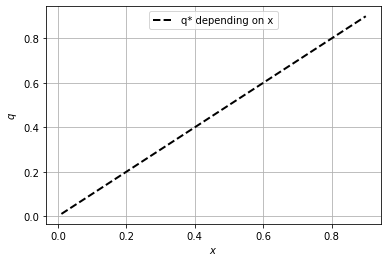

In [9]:
# first try to optimize for given level of x = 0.5
x=0.5
N = 1000
q_vec = np.linspace(0.01,x,N)
u_vec = np.empty(N)
u_best = -999 # initial maximum
q_best = np.nan # not-a-number

for i,q in enumerate(q_vec):
    u_now = u_vec[i] = ip.u_ins(q)
    if u_now>u_best:
        q_best=q
        u_best=ip.u_ins(q, x=x)
        
print(f'best with loop for fixed x = 0.5 is           {u_best:.8f} at q = {q_best:.8f}')
print("want to insure 100% of loss as risk averse")


# now optimize for different levels of x
q_save = np.empty(N)
x = np.linspace(0.01,0.9,N)
for ind, x_i in enumerate(x):
    q_vec = np.linspace(0.01,x_i,N)
    u_vec = np.empty(N)
    u_best = -999 # initial maximum
    q_best = np.nan # not-a-number
    for i,q in enumerate(q_vec):
        u_now = u_vec[i] = ip.u_ins(q, x=x_i)
        if u_now>u_best:
            q_best=q
            u_best=ip.u_ins(q, x=x_i)
    print(f'best with loop for x = {x_i:.8f} is {u_best:.8f} at q = {q_best:.8f}')
    q_save[ind]=q_best

     

# plot the findings in a figure
fig = plt.figure() # dpi = dots-per-inch (resolution)
ax = fig.add_subplot(1,1,1)
ax.plot(x,q_save,ls='--',lw=2,color='black',label='q* depending on x')
ax.set_xlabel('$x$')
ax.set_ylabel('$q$')
ax.grid(True)
ax.legend(loc='upper center')

*findings* <br>
 we find that the agent always sets q=x. This means that the agent insures the full amoung of the possible loss. We see that the utility function with the parameter v=-2 is a very risk-averse utility funciton.  <br>
 Thus, the agent always insures himself fully with the given price schedule.

# Question 2

Explain your code and procedure

utility value of not being insured:
-1.3
pi that sets consumer indifferent of being/not being insured for q=0.4
0.18105550493427564
utility value of being insured with that pi at q=0.4, should be as close at possible at -1.3
-1.299997932424393
now we analyze multiple levels of q
###testing###
utility level of not being insured:
-1.3
utility level of being insured at some point (to be selected in code)
-1.3
test for all, when everything worked a dot (.) is printed, otherwise an error
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.


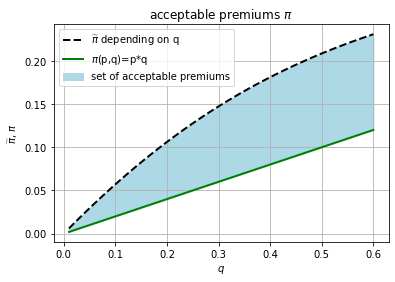

In [4]:
#### We solve with a fixed x=0.6
x=0.6

# print the utility level of uninsured people as a reference
print("utility value of not being insured:")
print(ip.u_unins(x=0.6))

# first solve for fixed q = 0.4 and then later loop over possible values of q
# define objective function: minimize absolute value of insured utility and uninsured utility (should equal 0 --> we minimize)
def choose(pi):
    return np.absolute(ip.u_ins_pi(pi=pi, q=0.4, x=0.6)-ip.u_unins(x=0.6))

# call solver
sol = optimize.minimize_scalar(
    choose,
    method='bounded',
    bounds=(0,0.6)) #we do not allow to pay more than you are insured for maximally

pi = sol.x
print("pi that sets consumer indifferent of being/not being insured for q=0.4")
print(pi)
print("utility value of being insured with that pi at q=0.4, should be as close at possible at -1.3")
print(ip.u_ins_pi(pi=pi, q=0.4, x=0.6))


#### now we analyze the problem for different levels of q
print("now we analyze multiple levels of q")

# now do for all q between 0.01 and 0.6
pi_save = np.empty(100)
ins_acc = np.empty(100)
q_vec = np.linspace(0.01, 0.6, 100)
for i, q in enumerate(q_vec):
    #define what we want to minimize
    def choose(pi):
        return np.absolute(ip.u_ins_pi(pi=pi, q=q)-ip.u_unins(x=0.6))
    #call solver
    sol = optimize.minimize_scalar(
        choose,
        method='bounded',
        bounds=(0,0.6)) #we do not allow to pay more than you maximally are insured for (=max claim)
    pi=sol.x
    pi_save[i]=pi
    ins_acc[i] = 0.2*q

    
# figure 
fig = plt.figure() 
ax = fig.add_subplot(1,1,1)
ax.plot(q_vec,pi_save,ls='--',lw=2,color='black',label='$\widetilde{\pi}$ depending on q')
ax.plot(q_vec,ins_acc,ls='-',lw=2,color='green',label='$\pi$(p,q)=p*q')
ax.fill_between(q_vec, ins_acc, pi_save, color="lightblue", label="set of acceptable premiums")
ax.set_xlabel('$q$')
ax.set_ylabel('$ \widetilde{\pi} $, $\pi$')
ax.grid(True)
ax.legend(loc='upper left')
plt.title("acceptable premiums $\pi$")



# testing
print("###testing###")
print("utility level of not being insured:")
print(ip.u_unins(x=0.6))   # print uninsured utility level
test=1   # select which observation of result vectors to check
print("utility level of being insured at some point (to be selected in code)")
print(round(ip.u_ins_pi(q=q_vec[test], pi=pi_save[test]),3))  # must always by around -1.3

print("test for all, when everything worked a dot (.) is printed, otherwise an error")
for  i, pi in enumerate(pi_save):
    if ip.u_unins(x=0.6)-round(ip.u_ins_pi(q=q_vec[i], pi=pi),1) == 0:
        print(".")
    else:
        print("ERROR, CHECK AGAIN")





# Question 3

Explain your code and procedure

In [18]:
# define z value
def z(y, gamma, x, pi):
    z = y - (1 - gamma)*x - pi
    return z

a = 2
b = 7
N = 10000

# array of zeros of length N
x = np.zeros(N)

# iterating over each Value of x and filling it with a random value in beta distribution (a,b)
np.random.seed(123)
for i in range (len(x)):
    x[i] = random.beta(a,b)

# variable to store sum of the functions of different values of x
integral = 0

for i in x:
    y = 1
    gamma = 0.9
    pi = 0.2
    z = y - (1 - gamma)*i - pi
    integral += ip.u(z, v=-2)
    
# we get the answer 
ans = 1/N*integral

# prints the solution
print (f"The value calculated by monte carlo integration for gamma = {0.9} and pi = {0.2} is {ans}.".format(ans))


integral_2 = 0
for i in x:
    y = 1
    gamma = 0.45
    pi = 0.1
    z = y - (1 - gamma)*i - pi
    integral_2 += ip.u(z, v=-2)
    
# we get the answer 
ans_2 = 1/N*integral_2

# prints the solution
print (f"The value calculated by monte carlo integration for gamma = {0.45} and pi = {0.1} is {ans_2}.".format(ans_2))

The value calculated by monte carlo integration for gamma = 0.9 and pi = 0.2 is -1.2858562100115751.
The value calculated by monte carlo integration for gamma = 0.45 and pi = 0.1 is -1.2965582462632568.


*findings* <br>
We find that the agent prefers a gamma of 0.9 and a price of 0.2 over a gamma of 0.4 and a price of 0.1. <br>
This is consistent with exercise 1, where we find a strong risk-aversion of the agent. He wants to insure as much as possible and is therefore also willing to pay for it.

# Question 4

In [39]:
# customer wants gamma=0.95, which pi do we set?
# offer just acceptable for consumer --> u_ins=u_unins --> use root finder for that
# Monte Carlo simulate draws from Beta distribution (for-loop):
## each time root find pi to set u_ins-u_unins=0 --> save pi
## take average over pi's
def z(y, gamma, x, pi):
    z = y - (1 - gamma)*x - pi
    return z

y=1
gamma=0.95
pi=0.2
a = 2
b = 7
N = 10000

# array of zeros of length N
x = np.zeros(N)

# iterating over each Value of x and filling it with a random value in beta distribution (a,b)
np.random.seed(123)
for i in range (len(x)):
    x[i] = random.beta(a,b)

# variable to store sum of all pi of different values of x
pi = 0

for i in x:
    pi_guess = [0]
    obj = lambda pi: ip.u(z(y=y, gamma=gamma, x=i, pi=pi))-ip.u(y-i)
    res = optimize.root(obj,pi_guess,method='broyden1')
    pi += res.x[0]


# to get the answer, what we offer is average of all optimal pis
ans = pi/N

print(ans)


0.2098184977611727


ADD CONCISE CONLUSION.